## 线性回归的从零开始实现

In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

样本特征$X\epsilon \mathbb R^{1000\times 2}$

假设真实权重为：$w=[2,-2]^T$和偏差：$b=5.5$以及随即噪声项来生成标签

$y=Xw+b+\epsilon$

噪声项服从均值为$0$，标准差为$0.01$的正态分布

In [2]:
num_features=2
num_examples=1000
true_w=[2,-2]
true_b=5.5
examples = torch.randn(num_examples,num_features,dtype=torch.float32)
labels = true_w[0]*examples[:,0]+true_w[1]*examples[:,1]+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size())
                    ,dtype=torch.float32)
labels

tensor([ 7.6909e+00,  3.5171e+00,  6.7005e+00,  6.0430e+00,  4.1483e+00,
         1.0069e+01,  5.2007e+00,  5.2973e+00,  7.7037e+00,  2.3417e+00,
         3.2746e+00,  6.5421e+00,  5.9689e+00,  3.8972e+00,  7.8409e+00,
         3.9663e+00,  4.4344e+00,  4.3075e+00,  1.6344e+00,  2.3856e+00,
         5.0586e+00,  1.0182e+01,  3.6374e+00,  5.0535e+00,  2.5500e+00,
         8.2227e+00,  8.9548e+00,  9.5540e+00,  9.2600e+00,  1.4345e+00,
         1.2135e+01, -9.2057e-01, -8.4739e-01,  4.0568e+00,  3.8415e+00,
         5.3106e+00,  5.7756e+00,  8.5374e+00,  6.3429e+00,  6.0335e+00,
         5.4881e+00,  6.6154e+00,  6.7773e+00,  4.1926e+00,  3.0433e+00,
         5.8172e+00,  8.4182e+00,  8.3521e+00,  5.3800e+00,  6.1031e+00,
         6.5959e+00,  9.2305e+00,  7.3616e+00,  2.8086e+00,  4.3912e+00,
         7.8759e+00,  5.3504e+00,  8.9518e+00,  2.4143e+00,  4.5676e+00,
         4.2807e+00,  1.0211e+01,  9.0621e+00,  6.5513e+00,  3.7284e+00,
         2.3753e+00,  6.8417e+00,  5.1565e+00, -4.7

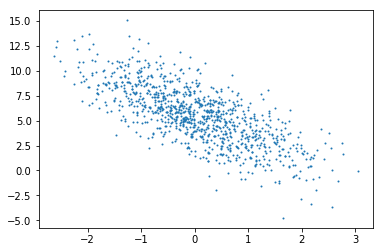

In [3]:
plt.scatter(examples[:,1].numpy(),labels.numpy(),1)
plt.show()

In [4]:
def data_iter(batch_size,examples,labels):
    num_examples=len(examples)
    indices = list(range(num_examples))
#     print(indices)
    random.shuffle(indices)
#     print(indices)
    for i in range(0,num_examples,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size
                                           ,num_examples)])
#         print(j)
        yield examples.index_select(0,j),labels.index_select(0,j)

In [5]:
batch_size=10

In [6]:
w=torch.tensor(np.random.normal(0,0.01,(num_features,1)),
              dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)
# print(w,b)

In [7]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

定义模型

In [8]:
def linreg(X,w,b):
    return torch.mm(X,w)+b

定义损失函数

In [9]:
def loss_function(y_hat,y):
    # 返回向量
    return (y_hat-y.view(y_hat.size())) ** 2 / 2

定义优化算法

In [10]:
def sgd(params,step,batch_size):
    for param in params:
        param.data -= step*param.grad/batch_size

In [11]:
step = 0.01
epochs = 5
net = linreg
loss = loss_function
for epoch in range(epochs):
    for X,y in data_iter(batch_size,examples,labels):
        sum_loss = loss(net(X,w,b),y).sum() #将返回向量求和
        sum_loss.backward() #求梯度
        sgd([w,b],step,batch_size) #小批量梯度下降法
        
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    loss_epoch = loss(net(examples,w,b),labels)
    print('epoch %d, loss %f' 
          % (epoch+1,loss_epoch.mean().item()))


epoch 1, loss 2.515351
epoch 2, loss 0.326920
epoch 3, loss 0.042884
epoch 4, loss 0.005710
epoch 5, loss 0.000804


$w$，$b$与$w_{true}$，$b_{true}$的比较

In [12]:
print(w,'\n',true_w)
print(b,'\n',true_b)

tensor([[ 1.9969],
        [-1.9857]], requires_grad=True) 
 [2, -2]
tensor([5.4635], requires_grad=True) 
 5.5
